<h1> Final Project : CelebVoice : Celebrity Speech Recognition

![](https://www.google.com/search?q=logo+the+voice&sxsrf=ACYBGNQ5ZFhNXQAmqQ9-zR_YS-er7LpqEg:1581968193477&tbm=isch&source=iu&ictx=1&fir=mLqThEd35MepjM%253A%252CYKE0JDhJksf_CM%252C_&vet=1&usg=AI4_-kSToQsHm_1mgqT_g4jz61FAlciU1A&sa=X&ved=2ahUKEwiRht_hqtnnAhVFJhoKHRCvBVAQ9QEwBXoECAoQDg#imgrc=mLqThEd35MepjM)

<h2> Objective

Recognize celebrity speakers from any speech :
[Project Plan](https://docs.google.com/presentation/d/16wNe2B3FZuiwzTYpEq4Us9K1lSrWAeuP5wIO_sBCzRY/edit?usp=sharing)

I choose this project because I am fascinated by voice assistant as Siri or Alexa and I would like to study voice recognition part.
   
*Source : Extract from The VoxCeleb Speaker Recognition Challenge (VoxSRC - University of Oxford) :* [VoxCeleb Speaker Recognition Challenge (VoxSRC)](http://www.robots.ox.ac.uk/~vgg/data/voxceleb/competition.html)

<h2> Prerequisites

I crate a virtual environment for my project to can export it later and avoid versioning issue. I install different packages with `pip install -r requirements.txt` command : 

In [3]:
ls

Final-Project.ipynb  requirements.txt  venv/


In [1]:
cat requirements.txt

Python==3.7.4
Pandas==1.0.0
Numpy==1.17.2
Scipy==1.3.1
Scikit-learn==0.21.3
Librosa==0.7.2
Matplotlib==3.1.1
Seaborn==0.10.0
Pyaudio==0.2.11


- I install LibROSA library, a python package for music and audio analysis : [LibROSA — librosa 0.7.2 documentation](https://librosa.github.io/librosa/)

- I install pyAudio library to play and record audio : [PyAudio documentation](https://people.csail.mit.edu/hubert/pyaudio/docs/)

- I read documentation on voiceprint to can identify each celebrity voice on my audio files :

https://maelfabien.github.io/machinelearning/Speech11/#

https://towardsdatascience.com/voice-classification-with-neural-networks-ff90f94358ec

http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

https://deeplylearning.fr/cours-pratiques-deep-learning/reconnaissance-vocale-de-mots-cles/

<h2> Import

I import all my needed librairies here and I report them for each chapter :

In [2]:
import sys
sys.path.append('/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020/venv/lib/python3.7/site-packages')

#Data Manipulation
import os, pandas as pd

#Regular expression research
import re

#Feature extraction
import librosa               #Audio library

#Data Storage
import pickle

#Data visualization
import matplotlib.pyplot as plt, seaborn as sns

<h2> Dataset

📥 I dowload the VoxCeleb1 dataset on : [VoxCeleb : A large scale audio-visual dataset of human speech](http://www.robots.ox.ac.uk/~vgg/data/voxceleb/index.html#portfolio) :

- I am limited to use the VoxCeleb1 dataset because is lower than which give by the VoxSRC Challenge and my CPU will support it.
- It contains 145261 audio files (wav format) extracted from YouTube videos of celebrity interviews : 1251 celebrity speakers
- My data is labelised : Using Supervised Machine Learning Model
- My targets are discrete values : I am in Classification case and I use Random Forest model (perhaps Deep Learning)

`vox1_meta.csv` contains metadata for all the speakers in the dataset : full names, nationality and gender labels. I explore this file to have more informations on my dataset :

In [5]:
# I verify my path
!pwd

/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020


I define my file path to import `vox1_meta.csv` in a dataframe named `celebrity_speakers_data` :

In [3]:
filepath = os.path.join('..', '..', '..', '..', 'Documents', 'Final-Project-data', 'vox1_meta.csv')

In [7]:
filepath

'../../../../Documents/Final-Project-data/vox1_meta.csv'

In [4]:
celebrity_speakers_data = pd.read_csv(filepath, delim_whitespace=True)

<h3> 1. Celebrity speakers : Data Exploration

My dataframe has 1251 rows corresponding to number of celebrity speakers interviewed and 5 columns corresponding to :

1. `VoxCeleb1_ID` : celebrity speakers ID
2. `VGGFace1_ID` : celebrity speakers names
3. `Gender` : celebrity speakers gender
4. `Nationality` : celebrity speakers nationality
5. `Set` : if celebrity will use for train (dev) or test model part

In [9]:
celebrity_speakers_data.shape

(1251, 5)

In [10]:
celebrity_speakers_data.head()

VoxCeleb1_ID   VGGFace1_ID Gender Nationality  Set
0      id10001  A.J._Buckley      m     Ireland  dev
1      id10002   A.R._Rahman      m       India  dev
2      id10003    Aamir_Khan      m       India  dev
3      id10004   Aaron_Tveit      m         USA  dev
4      id10005     Aaron_Yoo      m         USA  dev

All my dataframe is string type and it seems there aren't `NAN` values :

In [11]:
celebrity_speakers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 5 columns):
VoxCeleb1_ID    1251 non-null object
VGGFace1_ID     1251 non-null object
Gender          1251 non-null object
Nationality     1251 non-null object
Set             1251 non-null object
dtypes: object(5)
memory usage: 49.0+ KB


<h3> 2. Celebrity speakers : Data Cleaning

I verify again if there aren't `NAN` values to can exploit and visualize my data :

In [12]:
celebrity_speakers_data.isna().sum()

VoxCeleb1_ID    0
VGGFace1_ID     0
Gender          0
Nationality     0
Set             0
dtype: int64

I control duplicates :

In [13]:
celebrity_speakers_data.duplicated().sum()

0

My data is cleaned but I have to change my columns because I need numerical values to plot data :

In [14]:
celebrity_speakers_data.head()

VoxCeleb1_ID   VGGFace1_ID Gender Nationality  Set
0      id10001  A.J._Buckley      m     Ireland  dev
1      id10002   A.R._Rahman      m       India  dev
2      id10003    Aamir_Khan      m       India  dev
3      id10004   Aaron_Tveit      m         USA  dev
4      id10005     Aaron_Yoo      m         USA  dev

<h3> 3. Celebrity speakers : Data Analysis

I plot dataset repartition between dev and test :

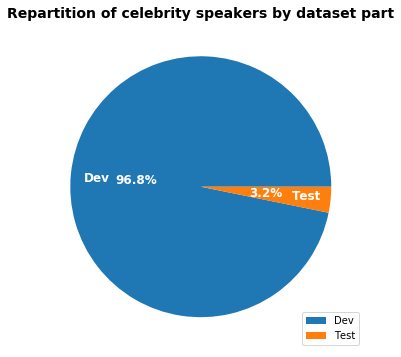

In [15]:
plt.figure(figsize=(8,6))

textprops={'color': 'w', 'size': 12, 'weight': 'bold'}             #Text property
labels = ['Dev', 'Test']                                           #Dataset part label

plt.pie(x=celebrity_speakers_data['Set'].value_counts(),
        labels=labels,
        autopct='%1.1f%%',                                         #Labels proportion
        pctdistance=.5, 
        labeldistance=.7, 
        textprops=textprops)                                       #Text property

plt.title('Repartition of celebrity speakers by dataset part',     #Diagram title
          fontdict={'size': 14, 'fontweight': 'bold'})

plt.legend(loc='lower right')                                      #Legend location

plt.show()

I use `get_dummies` function to transform my different values into numerical values :

In [16]:
celebrity_speakers_data['Gender'].value_counts()

m    690
f    561
Name: Gender, dtype: int64

In [5]:
celebrity_speakers_data['Gender'] = pd.get_dummies(celebrity_speakers_data['Gender'], prefix='Gender', drop_first=True)

For the column `Gender` : 1 corresponding to male gender and 0 is for female gender

In [6]:
celebrity_speakers_data.head()

VoxCeleb1_ID   VGGFace1_ID  Gender Nationality  Set
0      id10001  A.J._Buckley       1     Ireland  dev
1      id10002   A.R._Rahman       1       India  dev
2      id10003    Aamir_Khan       1       India  dev
3      id10004   Aaron_Tveit       1         USA  dev
4      id10005     Aaron_Yoo       1         USA  dev

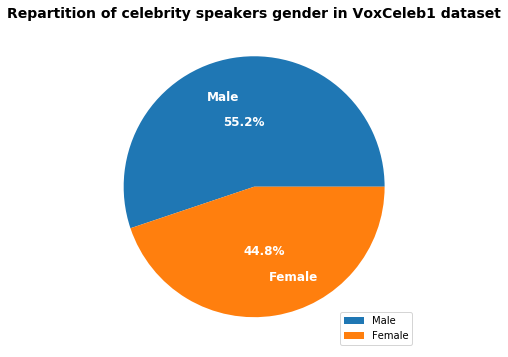

In [19]:
plt.figure(figsize=(8,6))

textprops={'color': 'w', 'size': 12, 'weight': 'bold'}                      #Text property
labels = ['Male', 'Female']                                                 #Gender labels

plt.pie(x=celebrity_speakers_data['Gender'].value_counts(), 
        labels=labels, 
        autopct='%1.1f%%',                                                  #Labels proportion
        pctdistance=.5, 
        labeldistance=.7, 
        textprops=textprops)                                                #Text property

plt.title('Repartition of celebrity speakers gender in VoxCeleb1 dataset',  #Diagram title
          fontdict={'size': 14, 'fontweight' : 'bold'})  

plt.legend(loc='lower right')                                               #Legend location

plt.show()

There is more and less the same gender repartition for celebrity speakers.

I plot nationality repartition for celebrity speakers : American and Englishman are majority.

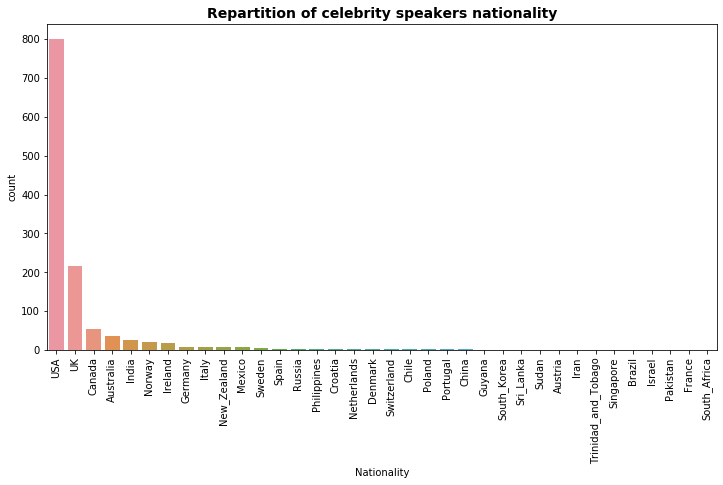

In [20]:
plt.figure(figsize=(12, 6))

plt.title('Repartition of celebrity speakers nationality', fontweight="bold", size=14)  #Diagram title

sns.countplot(x='Nationality',
              data=celebrity_speakers_data,
              order=celebrity_speakers_data['Nationality'].value_counts().index)

plt.xticks(rotation=90)                                                                 #abscissa label positioning

plt.show()

I choose American and Englishman speakers to train my model and reduce time calculation : 1014 celebrity speakers is selected :

In [21]:
celebrity_speakers_data_limited = celebrity_speakers_data.loc[(celebrity_speakers_data['Nationality'] == 'USA') | (celebrity_speakers_data['Nationality'] == 'UK')]
celebrity_speakers_data_limited.head()

VoxCeleb1_ID      VGGFace1_ID  Gender Nationality  Set
3      id10004      Aaron_Tveit       1         USA  dev
4      id10005        Aaron_Yoo       1         USA  dev
6      id10007  Abigail_Breslin       0         USA  dev
7      id10008  Abigail_Spencer       0         USA  dev
9      id10010       Adam_Brody       1         USA  dev

In [22]:
celebrity_speakers_data_limited.shape

(1014, 5)

I use `get_dummies` function to transform `Nationality` column into numerical values : 1 for American and 0 for Englishman :

In [23]:
celebrity_speakers_data_limited['Nationality'] = pd.get_dummies(celebrity_speakers_data_limited['Nationality'], drop_first=True, prefix='Nationality')

/home/jlenclume/bin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
celebrity_speakers_data_limited.head()

VoxCeleb1_ID      VGGFace1_ID  Gender  Nationality  Set
3      id10004      Aaron_Tveit       1            1  dev
4      id10005        Aaron_Yoo       1            1  dev
6      id10007  Abigail_Breslin       0            1  dev
7      id10008  Abigail_Spencer       0            1  dev
9      id10010       Adam_Brody       1            1  dev

In [25]:
celebrity_speakers_data_limited['Nationality'].value_counts()

1    799
0    215
Name: Nationality, dtype: int64

<h3> A revoir

For `Nationality`, I decide to keep USA, UK and I create a new nationality named **Rest_of_world** because they is in minority :

In [26]:
celebrity_speakers_data['Nationality'].unique()

array(['Ireland', 'India', 'USA', 'Australia', 'Canada', 'UK', 'Norway',
       'Italy', 'Sudan', 'Mexico', 'China', 'Switzerland', 'Guyana',
       'Philippines', 'New_Zealand', 'Germany', 'Portugal', 'Netherlands',
       'Spain', 'France', 'Pakistan', 'Croatia', 'South_Korea', 'Sweden',
       'Russia', 'Poland', 'Sri_Lanka', 'Singapore', 'Chile', 'Israel',
       'Brazil', 'Trinidad_and_Tobago', 'Denmark', 'Austria',
       'South_Africa', 'Iran'], dtype=object)

In [18]:
nat_bool = (celebrity_speakers_data['Nationality'] != 'USA') & (celebrity_speakers_data['Nationality'] != 'UK')

In [22]:
celebrity_speakers_data.loc[nat_bool].Nationality.apply(lambda x: 'Rest_of_world')

0       Rest_of_world
1       Rest_of_world
2       Rest_of_world
5       Rest_of_world
8       Rest_of_world
            ...      
1211    Rest_of_world
1214    Rest_of_world
1226    Rest_of_world
1236    Rest_of_world
1239    Rest_of_world
Name: Nationality, Length: 237, dtype: object

In [24]:
def replace_nationality(nationality):
    '''
    
    '''
    
    if nationality != 'USA' and nationality != 'UK':
        return 'Rest_of_world'

In [23]:
celebrity_speakers_data

VoxCeleb1_ID     VGGFace1_ID  Gender Nationality  Set
0         id10001    A.J._Buckley       1     Ireland  dev
1         id10002     A.R._Rahman       1       India  dev
2         id10003      Aamir_Khan       1       India  dev
3         id10004     Aaron_Tveit       1         USA  dev
4         id10005       Aaron_Yoo       1         USA  dev
...           ...             ...     ...         ...  ...
1246      id11247    Zachary_Levi       1         USA  dev
1247      id11248  Zachary_Quinto       1         USA  dev
1248      id11249     Zack_Snyder       1         USA  dev
1249      id11250     Zoe_Saldana       0         USA  dev
1250      id11251     Zulay_Henao       0         USA  dev

[1251 rows x 5 columns]

In [12]:
celebrity_speakers_data.loc[celebrity_speakers_data['Nationality'] != 'UK']

VoxCeleb1_ID     VGGFace1_ID  Gender Nationality  Set
0         id10001    A.J._Buckley       1     Ireland  dev
1         id10002     A.R._Rahman       1       India  dev
2         id10003      Aamir_Khan       1       India  dev
3         id10004     Aaron_Tveit       1         USA  dev
4         id10005       Aaron_Yoo       1         USA  dev
...           ...             ...     ...         ...  ...
1246      id11247    Zachary_Levi       1         USA  dev
1247      id11248  Zachary_Quinto       1         USA  dev
1248      id11249     Zack_Snyder       1         USA  dev
1249      id11250     Zoe_Saldana       0         USA  dev
1250      id11251     Zulay_Henao       0         USA  dev

[1036 rows x 5 columns]

In [13]:
celebrity_speakers_data.loc[celebrity_speakers_data['Nationality'] != 'USA']

VoxCeleb1_ID    VGGFace1_ID  Gender Nationality  Set
0         id10001   A.J._Buckley       1     Ireland  dev
1         id10002    A.R._Rahman       1       India  dev
2         id10003     Aamir_Khan       1       India  dev
5         id10006  Abbie_Cornish       0   Australia  dev
8         id10009     Adam_Beach       1      Canada  dev
...           ...            ...     ...         ...  ...
1226      id11227    Will_Arnett       1      Canada  dev
1228      id11229    Will_Mellor       1          UK  dev
1229      id11230   Will_Poulter       1          UK  dev
1236      id11237    Wim_Wenders       1     Germany  dev
1239      id11240  Xavier_Samuel       1   Australia  dev

[452 rows x 5 columns]

In [85]:
celebrity_speakers_data.head()

VoxCeleb1_ID   VGGFace1_ID  Gender    Nationality  Set
0      id10001  A.J._Buckley       1  Rest_of_world  dev
1      id10002   A.R._Rahman       1  Rest_of_world  dev
2      id10003    Aamir_Khan       1  Rest_of_world  dev
3      id10004   Aaron_Tveit       1  Rest_of_world  dev
4      id10005     Aaron_Yoo       1  Rest_of_world  dev

In [111]:
celebrity_speakers_data['Nationality'].value_counts()

USA                    799
UK                     215
Canada                  54
Australia               37
India                   26
Norway                  20
Ireland                 18
Germany                  9
New_Zealand              8
Italy                    8
Mexico                   7
Sweden                   5
Russia                   4
Spain                    4
Chile                    3
Switzerland              3
Croatia                  3
Denmark                  3
Philippines              3
Netherlands              3
Poland                   2
Portugal                 2
China                    2
South_Africa             1
France                   1
Brazil                   1
Austria                  1
Sudan                    1
Pakistan                 1
Iran                     1
Guyana                   1
South_Korea              1
Sri_Lanka                1
Singapore                1
Trinidad_and_Tobago      1
Israel                   1
Name: Nationality, dtype: in

I save my `celebrity_speakers_data_limited` dataframe in a pickle file `celebrity_speakers_data_limited` to can use it later. It is the same method with `celebrity_speakers_data`:

In [27]:
!pwd

/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020


In [28]:
filepath_celebrity_data_limited = os.path.join('final-project-data', 'celebrity_speakers_data_limited.pkl')

In [29]:
with open(filepath_celebrity_data_limited, 'wb') as f:
    pickle.dump(celebrity_speakers_data_limited, f)

In [31]:
!ls final-project-data

celebrity_speakers_data_limited.pkl


In [7]:
filepath_celebrity_data = os.path.join('final-project-data', 'celebrity_speakers_data.pkl')

In [8]:
with open(filepath_celebrity_data, 'wb') as f:
    pickle.dump(celebrity_speakers_data, f)

<h2> 1. Audio files Treatment

<h3> 1.1 Data Comprehension

I import `celebrity_speakers_data.pkl` and `celebrity_speakers_data_limited.pkl` to use dataframe :

In [17]:
filepath_celebrity_data_limited = os.path.join('final-project-data', 'celebrity_speakers_data_limited.pkl')

In [18]:
with open(filepath_celebrity_data_limited, 'rb') as f:
    celebrity_speakers_data_limited = pickle.load(f)

In [19]:
celebrity_speakers_data_limited.head()

VoxCeleb1_ID      VGGFace1_ID  Gender  Nationality  Set
3      id10004      Aaron_Tveit       1            1  dev
4      id10005        Aaron_Yoo       1            1  dev
6      id10007  Abigail_Breslin       0            1  dev
7      id10008  Abigail_Spencer       0            1  dev
9      id10010       Adam_Brody       1            1  dev

In [9]:
filepath_celebrity_data = os.path.join('final-project-data', 'celebrity_speakers_data.pkl')

In [10]:
with open(filepath_celebrity_data, 'rb') as f:
    celebrity_speakers_data = pickle.load(f)

In [11]:
celebrity_speakers_data.head()

VoxCeleb1_ID   VGGFace1_ID  Gender Nationality  Set
0      id10001  A.J._Buckley       1     Ireland  dev
1      id10002   A.R._Rahman       1       India  dev
2      id10003    Aamir_Khan       1       India  dev
3      id10004   Aaron_Tveit       1         USA  dev
4      id10005     Aaron_Yoo       1         USA  dev

Now, I explore my audio files dataset :

In [35]:
!pwd

/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020


In [37]:
!ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav

id10001  id10136  id10311  id10446  id10581  id10716  id10851  id10986	id11121
id10002  id10137  id10312  id10447  id10582  id10717  id10852  id10987	id11122
id10003  id10138  id10313  id10448  id10583  id10718  id10853  id10988	id11123
id10004  id10139  id10314  id10449  id10584  id10719  id10854  id10989	id11124
id10005  id10140  id10315  id10450  id10585  id10720  id10855  id10990	id11125
id10006  id10141  id10316  id10451  id10586  id10721  id10856  id10991	id11126
id10007  id10142  id10317  id10452  id10587  id10722  id10857  id10992	id11127
id10008  id10143  id10318  id10453  id10588  id10723  id10858  id10993	id11128
id10009  id10144  id10319  id10454  id10589  id10724  id10859  id10994	id11129
id10010  id10145  id10320  id10455  id10590  id10725  id10860  id10995	id11130
id10011  id10146  id10321  id10456  id10591  id10726  id10861  id10996	id11131
id10012  id10147  id10322  id10457  id10592  id10727  id10862  id10997	id11132
id10013  id10148  id10323  id10458  id10593  id10728

In [ ]:
!ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav

For example, I choose two celebrity ID : id10965 corresponds to Regina_Hall and id11109	corresponds to Stephen Baldwin.

In [38]:
!ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/id10965

0AdxTgLLbFY/  avNaBy3u3Ow/  JRXA-X2K5zc/  pGMcglQYXYE/  zZ2uBOISm5Q/
4GbjXgL5-yQ/  CYf4vAgT_iQ/  koRHZBBT_VI/  QXWsnscCJLI/
9-XitQATNL8/  GH0kJfikbOU/  OHDRhzSfICk/  TKek4WAhbSE/
AuYQOAiIzk0/  IXwnjoHthfA/  OJIfvnH1ymk/  Xo0b4f0UVEA/


In [39]:
celebrity_speakers_data_limited.loc[celebrity_speakers_data_limited['VoxCeleb1_ID'] == 'id10965']

VoxCeleb1_ID  VGGFace1_ID  Gender  Nationality  Set
964      id10965  Regina_Hall       0            1  dev

In [40]:
ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/id10965/0AdxTgLLbFY

00001.wav


In [44]:
celebrity_speakers_data_limited.loc[celebrity_speakers_data_limited['VoxCeleb1_ID'] == 'id11109']

VoxCeleb1_ID      VGGFace1_ID  Gender  Nationality  Set
1108      id11109  Stephen_Baldwin       1            1  dev

In [41]:
ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/id11109/410TXiXAVeU

00001.wav  00002.wav  00003.wav


I observe that there are several audios for each speaker in folders. I would like to add audio files in my dataframe to can exploit them later so I create a bash script `move_audio_files.sh` to gather and rename audio files :

In [46]:
!pwd

/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020


In [157]:
!cat move_audio_files.sh

#!/bin/bash
for celeb_id in `ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav`
do
	for lst_audio in `ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/$celeb_id`
	do
		for audio in  `ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/$celeb_id/$lst_audio`
		do
			cp ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/$celeb_id/$lst_audio/$audio ../../../../Documents/Final-Project-data/vox1_dev_wav/audio_files/$celeb_id-$lst_audio-$audio		
		done


	done
done


In [14]:
audio_files = !ls ../../../../Documents/Final-Project-data/vox1_dev_wav/audio_files
audio_files[:10]

['id10001-1zcIwhmdeo4-00001.wav',
 'id10001-1zcIwhmdeo4-00002.wav',
 'id10001-1zcIwhmdeo4-00003.wav',
 'id10001-7gWzIy6yIIk-00001.wav',
 'id10001-7gWzIy6yIIk-00002.wav',
 'id10001-7gWzIy6yIIk-00003.wav',
 'id10001-7gWzIy6yIIk-00004.wav',
 'id10001-7w0IBEWc9Qw-00001.wav',
 'id10001-7w0IBEWc9Qw-00002.wav',
 'id10001-7w0IBEWc9Qw-00003.wav']

<h3> 1.2 Dataframe building

I use LibROSA library to load audio files in my dataframe : 1 row represents 1 audio file :

In [12]:
filepath_audio_files = os.path.join('..', '..', '..', '..', 'Documents', 'Final-Project-data', 'vox1_dev_wav', 'wav', 'audio_files')

In [20]:
celebrity_speakers_data_final = celebrity_speakers_data_limited

In [39]:
celebrity_speakers_data_final.loc[celebrity_speakers_data_final['VoxCeleb1_ID'] == 'id10965', 'audio_files_test'] = audio_files[586] 

In [42]:
celebrity_speakers_data_final.loc[celebrity_speakers_data_final['VoxCeleb1_ID'] == 'id10965', 'audio_files_test'] = audio_files[587] 

In [35]:
a = celebrity_speakers_data_final[celebrity_speakers_data_final['audio_files_test'].isna() == False]

In [43]:
b = celebrity_speakers_data_final[celebrity_speakers_data_final['audio_files_test'].isna() == False]

In [40]:
a

VoxCeleb1_ID  VGGFace1_ID  Gender  Nationality  Set  \
964      id10965  Regina_Hall       0            1  dev   

                  audio_files_test  
964  id10006-7qUfkhbDaqc-00006.wav

In [44]:
b

VoxCeleb1_ID  VGGFace1_ID  Gender  Nationality  Set  \
964      id10965  Regina_Hall       0            1  dev   

                  audio_files_test  
964  id10006-7W9goO0lNrA-00001.wav

In [68]:
pd.concat([a, b], join='inner', ignore_index=True)

VoxCeleb1_ID  VGGFace1_ID  Gender  Nationality  Set  \
0      id10965  Regina_Hall       0            1  dev   
1      id10965  Regina_Hall       0            1  dev   

                audio_files_test  
0  id10006-7qUfkhbDaqc-00006.wav  
1  id10006-7W9goO0lNrA-00001.wav

In [28]:
pd.concat([celebrity_speakers_data_final.loc[celebrity_speakers_data_final['VoxCeleb1_ID'] == 'id10965', 'audio_files_test'] = audio_files[586], celebrity_speakers_data_final.loc[celebrity_speakers_data_final['VoxCeleb1_ID'] == 'id10965', 'audio_files_test'] = audio_files[587]], join=inner)

SyntaxError: invalid syntax (<ipython-input-28-a9ebbb2a4f1c>, line 1)

In [74]:
celebrity_speakers_data_final.head()

VoxCeleb1_ID      VGGFace1_ID  Gender  Nationality  Set audio_files_test
3      id10004      Aaron_Tveit       1            1  dev              NaN
4      id10005        Aaron_Yoo       1            1  dev              NaN
6      id10007  Abigail_Breslin       0            1  dev              NaN
7      id10008  Abigail_Spencer       0            1  dev              NaN
9      id10010       Adam_Brody       1            1  dev              NaN

In [ ]:
audio_

In [73]:
def load_audio_files():
    
    '''
    This function collects each audio files name and stores them in celebrity_speakers dataframe
    
    Parameters
    ------------
    
    Returns
    ------------
    dataframe with a new column called audio_files
    
    '''
    list_audio_name = []
    
    for audio_name in audio_files:
        for celeb_id in celebrity_speakers_data_limited['VoxCeleb1_ID'].values:
            if audio_name.split('-')[0] == celeb_id:
                #list_audio_name.append(audio_name)
                pd.concat([celebrity_speakers_data_final.loc[celebrity_speakers_data_final['VoxCeleb1_ID'] == celeb_id, 'audiofilestest'] = audio_name], ignore_index=True)
        
    return list_audio_name
        

SyntaxError: invalid syntax (<ipython-input-73-8972600d1f38>, line 20)

In [65]:
load_audio_files()

['id10004-6WxS8rpNjmk-00001.wav',
 'id10004-6WxS8rpNjmk-00002.wav',
 'id10004-6WxS8rpNjmk-00003.wav',
 'id10004-8mWxQ6DRO-U-00001.wav',
 'id10004-8mWxQ6DRO-U-00002.wav',
 'id10004-8mWxQ6DRO-U-00003.wav',
 'id10004-8mWxQ6DRO-U-00004.wav',
 'id10004-bIZQaEVuATQ-00001.wav',
 'id10004-bIZQaEVuATQ-00002.wav',
 'id10004-bIZQaEVuATQ-00003.wav',
 'id10004-bIZQaEVuATQ-00004.wav',
 'id10004-bIZQaEVuATQ-00005.wav',
 'id10004-bIZQaEVuATQ-00006.wav',
 'id10004-bIZQaEVuATQ-00007.wav',
 'id10004-bIZQaEVuATQ-00008.wav',
 'id10004-bIZQaEVuATQ-00009.wav',
 'id10004-bIZQaEVuATQ-00010.wav',
 'id10004-bIZQaEVuATQ-00011.wav',
 'id10004-bIZQaEVuATQ-00012.wav',
 'id10004-bIZQaEVuATQ-00013.wav',
 'id10004-bIZQaEVuATQ-00014.wav',
 'id10004-bIZQaEVuATQ-00015.wav',
 'id10004-bIZQaEVuATQ-00016.wav',
 'id10004-BOAd7pybyZw-00001.wav',
 'id10004-BOAd7pybyZw-00002.wav',
 'id10004-BOAd7pybyZw-00003.wav',
 'id10004-BOAd7pybyZw-00004.wav',
 'id10004-BOAd7pybyZw-00005.wav',
 'id10004-CCygVo0iPvw-00001.wav',
 'id10004-CCyg

<h3> 1.2 First approach : Extract numerical features with LibROSA library

After my research on internet, sound is a signal distinctive by a:
- frequency : 
- energy :
- tempo :
- MFCC :

I use LibROSA library to extract features from the audio file to train my model : I begin in one example.



In [17]:
x, sr = librosa.load(filepath_audio_id10965)

In [18]:
x

array([ 0.04559026,  0.0507981 ,  0.05007365, ..., -0.00407297,
       -0.00374473,  0.        ], dtype=float32)

In [19]:
sr

22050

In [15]:
librosa.core.load(filepath_audio_id11109)

(array([-0.02726793, -0.03107388, -0.025704  , ..., -0.00577887,
        -0.00425673,  0.        ], dtype=float32), 22050)